In [ ]:
%%bash
pip install --upgrade mxnet gluoncv
# optional - for displaying the image in notebook
pip install ipyplot
# After you run this cell, you need to restart
# the notebook

In [1]:
import gluoncv as gcv
import mxnet as mx
# mxnet NDarray 
from mxnet import nd

# MXNet Gluon Neural network layers.
from mxnet.gluon import nn

# optional for displaying the image
import ipyplot
import matplotlib.pyplot as plt
import numpy as np

# Load and display the image.  
Since matplotlib needs a parameter to show image in grayscale and two different mxnet routines can be
used to load an image both are shown.

In [2]:
# display via python
image_filepath = 'testy-grid.png'
img_filename_array = np.array([image_filepath])
ipyplot.plot_images(img_filename_array)

Using markdown show the file also
```
Markdown method with scaling parameter.
<img src="some_file.some_ext" width="400">
```
<img src="testy-grid.png" width="200">

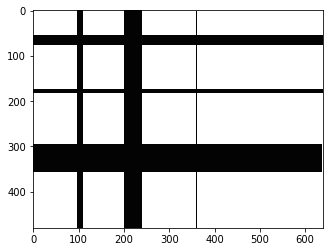

In [19]:
o = plt.imshow(plt.imread('testy-grid.png'))

In [20]:
# read as grayscale
image_HWC1 = mx.image.imread('testy-grid.png', 0)
image_HWC1f = image_HWC1.astype('float32')
print("image_HWC1")
print(type(image_HWC1))
print(image_HWC1.shape)
print("image_HWC1f")
print(type(image_HWC1f))
print(image_HWC1f.shape)
# plot image as grayscale
#plt.imshow(image_HWC1.asnumpy(), cmap='gray')

image_HWC1
<class 'mxnet.ndarray.ndarray.NDArray'>
(480, 640, 1)
image_HWC1f
<class 'mxnet.ndarray.ndarray.NDArray'>
(480, 640, 1)


image_HWC3
<class 'mxnet.ndarray.ndarray.NDArray'>
(480, 640, 3)


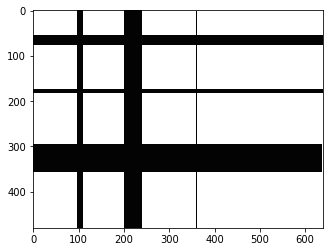

In [27]:
# Load Image
image_HWC3 = mx.image.image.imread('testy-grid.png')
print("image_HWC3")
print(type(image_HWC3))
print(image_HWC3.shape)
# plot Image
plt.imshow(image_HWC3.asnumpy())

# Build a neural net layer which is 2D convolution

In [28]:
# orig layer = nn.Conv2D(channels=1, kernel_size=(3,3), in_channels=1, strides=(1,1), padding=(0,0), activation='relu', prefix='conv_')
layer = nn.Conv2D(channels=1, kernel_size=(6,6), in_channels=1, strides=(1,1), padding=(0,0), activation='relu', prefix='conv_')
layer

Conv2D(1 -> 1, kernel_size=(6, 6), stride=(1, 1), Activation(relu))

In [29]:
# Using what he calls Sobel vertical
layer.initialize(mx.init.Constant([
    [1,1,1,1,1,1],
    [0,0,0,0,0,1],
    [0,0,0,0,0,0],
    [-2,0,0,0,0,2],
    [0,0,0,0,0,1],
    [1,1,1,1,1,1]]
))

# orig
#layer.initialize(mx.init.Constant([
#    [-1,0,1],
#    [-2,0,2],
#    [-1,0,1]]
#))

# Apply transform

In [30]:
# So that its channel first. I would callthis variable image_CHW or image_CHWf
image_channel_first = image_HWC1f.transpose((2,0,1))
# Convert 3D to 4D with leading batch channel.  I would call this variable image_NCHW
image_batchified = image_channel_first.expand_dims(axis=0)
# Now its in NCHW format
print(image_batchified.shape)

(1, 1, 480, 640)


In [31]:
output = layer(image_batchified)

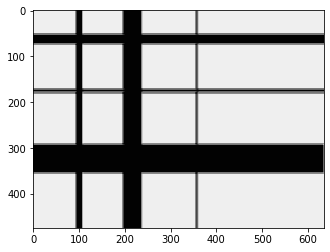

In [32]:
o = plt.imshow(output.squeeze().asnumpy(), cmap='gray')

# Notes about results
Vertical edges are detected with the exception of edges which are wider than the kernel width?  Odd, because below even the wide horizontal stripes are detected?

# Redo with different kernels

### Sobel Vertical Wikipedia

# create a nn
layer = nn.Conv2D(channels=1, kernel_size=(3,3), in_channels=1, strides=(1,1), padding=(0,0), activation='relu', prefix='conv_')

# Using the wikipedia Sobel vertical kernel
layer.initialize(mx.init.Constant([
    [1,0,-1],
    [2,0,-2],
    [1,0,-1]]
))
# So that its channel first. 
image_CHWf = image_HWC1f.transpose((2,0,1))
# Convert 3D to 4D with leading batch channel.  
image_NCHWf = image_CHWf.expand_dims(axis=0)
# Now its in NCHW format
output = layer(image_NCHWf)
# output is a 4D tensor in NCHW format
# Use squeeze to remove any 1-D dimension
result_numpy_HWC = output.squeeze().asnumpy()
# Return to 
plt.imshow(result_numpy_HWC, cmap='gray')

### Sobel Horizontal Wikipedia


Sobel horizontal transform Gx
[[ 1.  2.  1.]
 [ 0.  0.  0.]
 [-1. -2. -1.]]
<NDArray 3x3 @cpu(0)>


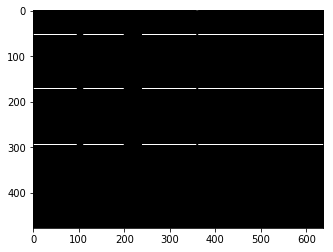

In [12]:
# The wikipedia Sobel horizontal kernel
sobel_horizontal = nd.array((
    ( 1,  2,  1),
    ( 0,  0,  0),
    (-1, -2, -1)
))

print("\nSobel horizontal transform Gx", end='')
print(sobel_horizontal)

# create a weight constant
w = mx.init.Constant(sobel_horizontal)

# create a nn. You need to do this.  Calling the layer.initialize() function below
# will not update the filter without it?
layer = nn.Conv2D(channels=1, kernel_size=(3,3), in_channels=1, strides=(1,1), padding=(0,0), activation='relu', prefix='conv_')

# init layer with this constant
layer.initialize(w)

# So that its channel first. 
image_CHWf = image_HWC1f.transpose((2,0,1))
# Convert 3D to 4D with leading batch channel.  
image_NCHWf = image_CHWf.expand_dims(axis=0)
# Now its in NCHW format
output = layer(image_NCHWf)
# output is a 4D tensor in NCHW format
# Use squeeze to remove any 1-D dimension
result_numpy_HWC = output.squeeze().asnumpy()
# show result
plt.imshow(result_numpy_HWC, cmap='gray')

### Matrix Transforms and Sobel 


Sobel vertical transform Gx
[[ 1.  0. -1.]
 [ 2.  0. -2.]
 [ 1.  0. -1.]]
<NDArray 3x3 @cpu(0)>

Kernel to apply
[[ 1.  2.  1.]
 [ 0.  0.  0.]
 [-1. -2. -1.]]
<NDArray 3x3 @cpu(0)>


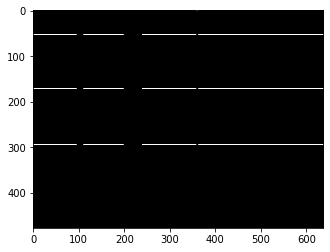

In [35]:
# Rather than using the horizontal kernel, just rotate the vertical
# First specify, the wikipedia Sobel vertical kernel
# Note because I intend to do multiplication, I can't init
# using the Constant.  I will use mxnet.initializer.Constant() when
# I am finished so I can use for initial weights of the neural network.
#foo = mx.init.Constant([
#    [1,0,-1],
#    [2,0,-2],
#    [1,0,-1]])
#foo.dumps()
sobel_vertical = nd.array((
    (1,0,-1),
    (2,0,-2),
    (1,0,-1)
))

print("\nSobel vertical transform Gx", end='')
print(sobel_vertical)

# Horizontal is just the vertical transposed.
sobel_horizontal = sobel_vertical.T

k =  sobel_horizontal

print("\nKernel to apply", end='')
print(k)


# create a weight constant
w = mx.init.Constant(k)

# create a nn
layer = nn.Conv2D(channels=1, kernel_size=(3,3), in_channels=1, strides=(1,1), padding=(0,0), activation='relu', prefix='conv_')

# init layer with this constant
layer.initialize(w)

# So that its channel first. 
image_CHWf = image_HWC1f.transpose((2,0,1))
# Convert 3D to 4D with leading batch channel.  
image_NCHWf = image_CHWf.expand_dims(axis=0)
# Now its in NCHW format
# apply the transform
output = layer(image_NCHWf)
# output is a 4D tensor in NCHW format
# Use squeeze to remove any 1-D dimension
result_numpy_HWC = output.squeeze().asnumpy()
# Show transformed image
plt.imshow(result_numpy_HWC, cmap='gray')

In [36]:
# playing with transforms
#
# https://en.wikipedia.org/wiki/Rotation_matrix
#

# Before I realized the vertical to horizontal was 
# just a simple transpose, I was trying to rotate
# the matrix.  
#
# The link above has 1D vector multiplied by a 3x3 matrix to 
# to rotate the 2 d vector.  I was mistakenly trying to do this
# with a 3x3 multiplied by a 3x3.

# Here are portions of that code for frobbing later.

# Rotate by 90 degrees to obtain Horizontal
# By default, rotation is specified positive as CCW
#angle = 90
#rotation = mx.init.Constant([
#    [1,0,1],
#    [0,1,0],
#    [0,0,1]
#])
# Common Rotations
rotation_0 = nd.array((
    (1,0,0),
    (0,1,0),
    (0,0,1)
))
rotation_90_x = nd.array((
    (  1,  0,  0),
    (  0,  0, -1),
    (  0,  1,  0)
))
rotation_90_y = nd.array((
    (  0,  0,  1),
    (  0,  1,  0),
    ( -1,  0,  0)
))
rotation_90_z = nd.array((
    (  0, -1,  0),
    (  1,  0,  0),
    (  0,  0,  1)
))

#rotation = rotation_90_try2
#print("\nChose rotation matrix", end='')
#print(rotation)
#k = rotation_90_x * sobel_vertical
#k = nd.dot(rotation_90_x, sobel_vertical)
#k = rotation_90_x * sobel_vertical.T
#k = nd.dot(rotation_90_x, sobel_vertical.T)

#k = rotation_90_y * sobel_vertical
#k = nd.dot(rotation_90_y, sobel_vertical)
#k = rotation_90_y * sobel_vertical.T
# this one came close
#k = nd.dot(rotation_90_y, sobel_vertical.T)

#k = rotation_90_z * sobel_vertical
#k = nd.dot(rotation_90_z, sobel_vertical)
#k = rotation_90_z * sobel_vertical.T
# this one came close
#k = nd.dot(rotation_90_z, sobel_vertical.T)


k = nd.dot(rotation_90_x, sobel_vertical)
print("\nKernel to apply", end='')
print(k)
k = nd.dot(rotation_90_x, k.T)


Kernel to apply
[[ 1.  0. -1.]
 [-1.  0.  1.]
 [ 2.  0. -2.]]
<NDArray 3x3 @cpu(0)>


In [37]:
k


[[ 1. -1.  2.]
 [ 1. -1.  2.]
 [ 0.  0.  0.]]
<NDArray 3x3 @cpu(0)>